# Twitter Sentiment Analysis 

* En este proyecto personal vamos a analizar los tweets de la Organización Mundial de la Salud
* Para llevar a cabo este proyecto tenemos que crearnos una aplicación de Twitter entrando a este link https://developer.twitter.com/en/apps

### Importamos las librerias necesarias

In [1]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

### Importamos el .csv donde estan las claves para autenticarse y nos autenticamos a Twitter

In [2]:
log = pd.read_csv("llaves.csv")

In [3]:
consumerKey = log["key"][0]
consumerSecret = log["key"][1]
accessToken = log["key"][2]
accessTokenSecret = log["key"][3]

In [4]:
authenticate = tweepy.OAuthHandler(consumerKey, consumerSecret) 
    
authenticate.set_access_token(accessToken, accessTokenSecret) 
    
api = tweepy.API(authenticate, wait_on_rate_limit = True)

### Extraemos los 100 ultimos tweets del usuario e imprimimos los ultimos 5

In [ ]:
import demoji
print("Show the 5 recent tweets:\n")
i=1
for tweet in posts[:5]:
    print(str(i) +') '+ tweet.full_text + '\n')
    i= i+1

In [5]:
posts = api.user_timeline(screen_name="WHO", count = 100, lang ="en", tweet_mode="extended")

print("Show the 5 recent tweets:\n")
i=1
for tweet in posts[:5]:
    print(str(i) +') '+ tweet.full_text + '\n')
    i= i+1

Show the 5 recent tweets:

1) Live Q&amp;A on #AntimicrobialResistence. #AskWHO https://t.co/q7VE3iSpks

2) RT @DrTedros: Congratulations, Prime Minister @katrinjak &amp; the people of #Iceland on this great progress! And thank you for sharing your go…

3) Live NOW with @DrTedros at the @IDLO Assembly of parties ⬇️ https://t.co/pj6i8v5pmJ

4) Are you 16-25 years old? 
Enjoy listening to 🎶music?
If yes, please spare 10mins &amp; participate in our survey on #SafeListening👂🏼:
🇬🇧 https://t.co/6xPPZjLoit
🇨🇳 https://t.co/yebs18BLQi
🇫🇷 https://t.co/qimBfxEEOE
🇪🇸 https://t.co/VI00s0JHpC https://t.co/Mt88kYjhD3

5) RT @DrTedros: Congratulations, my friend, @FilippoGrandi! Thank you for your outstanding leadership &amp; work to protect refugees around the w…



### Guardamos los tweets en un DataFrame y creamos una columna llamada Tweets

In [6]:
df = pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])
df.head()

,Tweets
0,Live Q&amp;A on #AntimicrobialResistence. #Ask...
1,"RT @DrTedros: Congratulations, Prime Minister ..."
2,Live NOW with @DrTedros at the @IDLO Assembly ...
3,Are you 16-25 years old? \nEnjoy listening to ...
4,"RT @DrTedros: Congratulations, my friend, @Fil..."


### Limpiamos la data

In [27]:
def cleanTxt(text):
    text = re.sub('@[A-Za-z0–9]+', '', text) #Elimino @menciones
    text = re.sub('#', '', text) # Elimino '#' hash tag
    text = re.sub('RT[\s]+', '', text) # Elimino RT
    text = re.sub('https?:\/\/\S+', '', text) # Elimino hyperlink
    
    return text
# Limpiamos los Tweets
df['Tweets'] = df['Tweets'].apply(cleanTxt)
df

,Tweets,Subjectivity,Polarity,Analysis
0,Live Q&amp;A on AntimicrobialResistence. AskWHO,0.500000,0.136364,Positive
1,": Congratulations, Prime Minister &amp; the p...",0.750000,1.000000,Positive
2,Live NOW with at the Assembly of parties ⬇️,0.500000,0.136364,Positive
3,Are you 16-25 years old? \nEnjoy listening to ...,0.350000,0.250000,Positive
4,": Congratulations, my friend, ! Thank you for ...",0.875000,0.500000,Positive
...,...,...,...,...
95,"""Today the tripartite is launching a new repor...",0.227273,0.068182,Positive
96,"""Thanks to the governments of the 🇳🇱, 🇸🇪 &amp;...",0.266667,0.010000,Positive
97,"""To help address that gap, together we have es...",0.300000,0.000000,Neutral
98,"""Our 3 organizations conduct regular surveys t...",0.519231,0.150000,Positive


### Clasificamos los tweets en subjetividad y positividad

In [28]:
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

# Creamos las columnas respectivas y usamos las funciones
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

df

,Tweets,Subjectivity,Polarity,Analysis
0,Live Q&amp;A on AntimicrobialResistence. AskWHO,0.500000,0.136364,Positive
1,": Congratulations, Prime Minister &amp; the p...",0.750000,1.000000,Positive
2,Live NOW with at the Assembly of parties ⬇️,0.500000,0.136364,Positive
3,Are you 16-25 years old? \nEnjoy listening to ...,0.350000,0.250000,Positive
4,": Congratulations, my friend, ! Thank you for ...",0.875000,0.500000,Positive
...,...,...,...,...
95,"""Today the tripartite is launching a new repor...",0.227273,0.068182,Positive
96,"""Thanks to the governments of the 🇳🇱, 🇸🇪 &amp;...",0.266667,0.010000,Positive
97,"""To help address that gap, together we have es...",0.300000,0.000000,Neutral
98,"""Our 3 organizations conduct regular surveys t...",0.519231,0.150000,Positive


### Vemos las palabras mas utulizadas

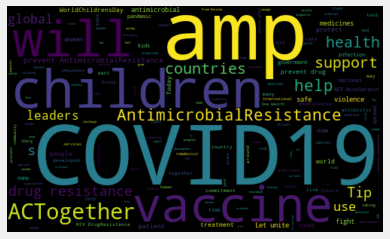

In [23]:
# word cloud
allWords = ' '.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)


plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

### Clasificamos los tweets en Negative, Neutral y Positive

In [29]:
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'
    
#Creamos la columna Analysis para la clasificacion
df['Analysis'] = df['Polarity'].apply(getAnalysis)
df 

,Tweets,Subjectivity,Polarity,Analysis
0,Live Q&amp;A on AntimicrobialResistence. AskWHO,0.500000,0.136364,Positive
1,": Congratulations, Prime Minister &amp; the p...",0.750000,1.000000,Positive
2,Live NOW with at the Assembly of parties ⬇️,0.500000,0.136364,Positive
3,Are you 16-25 years old? \nEnjoy listening to ...,0.350000,0.250000,Positive
4,": Congratulations, my friend, ! Thank you for ...",0.875000,0.500000,Positive
...,...,...,...,...
95,"""Today the tripartite is launching a new repor...",0.227273,0.068182,Positive
96,"""Thanks to the governments of the 🇳🇱, 🇸🇪 &amp;...",0.266667,0.010000,Positive
97,"""To help address that gap, together we have es...",0.300000,0.000000,Neutral
98,"""Our 3 organizations conduct regular surveys t...",0.519231,0.150000,Positive


In [30]:
# Imprimimos los tweets positivos
print('Printing positive tweets:\n')
j=1
sortedDF = df.sort_values(by=['Polarity'])
for i in range(0, sortedDF.shape[0] ):
    if( sortedDF['Analysis'][i] == 'Positive'):
        print(str(j) + ') '+ sortedDF['Tweets'][i])
        print()
        j= j+1

Printing positive tweets:

1) Live Q&amp;A on AntimicrobialResistence. AskWHO 

2) : Congratulations, Prime Minister  &amp; the people of Iceland on this great progress! And thank you for sharing your go…

3) Live NOW with  at the  Assembly of parties ⬇️ 

4) Are you 16-25 years old? 
Enjoy listening to 🎶music?
If yes, please spare 10mins &amp; participate in our survey on SafeListening👂🏼:
🇬🇧 
🇨🇳 
🇫🇷 
🇪🇸  

5) : Congratulations, my friend, ! Thank you for your outstanding leadership &amp; work to protect refugees around the w…

6) : I thank and congratulate 20org world leaders on a very productive G20RiyadhSummit, their strong commitment to fight COVID…

7) Tip to prevent AntimicrobialResistance 🔟:
Practice good hygiene! It prevents infections and slows the spread of AntibioticResistance.

Let's unite to prevent drug resistance!
 
👉  

8) We are InThisTogether to beat COVID19

Here are 5⃣ tips that help you stay safe to protect yourself and others:
🙌 clean hands
😷 wear a mask
📏 stay di

In [31]:
# Imprimimos los tweets negativos
print('Printing negative tweets:\n')
j=1
sortedDF = df.sort_values(by=['Polarity'],ascending=False) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
    if( sortedDF['Analysis'][i] == 'Negative'):
        print(str(j) + ') '+sortedDF['Tweets'][i])
        print()
        j=j+1

Printing negative tweets:

1) Tip to prevent AntimicrobialResistance 9⃣:
Never share antibiotics, antivirals or other medicines💊!
 
Let's unite to prevent drug resistance. 
 
👉  

2) "As countries have implemented StayAtHome orders and other measures to prevent transmission of COVID19, reports from women experiencing violence at home have increased. At the same time, services for survivors have been disrupted"- EndViolence

3) 3️⃣ factors that can help you make safe choices when you're in an area of widespread COVID19 transmission:
(1) Location
(2) Proximity with others
(3) Time you spend there



4) Other 🚧 for combating AntimicrobialResistance at country level are:
🔺Only ~50% of countries have national monitoring systems for antimicrobial sale &amp; use
🔺&gt;50% of countries have not widely implemented  national infection prevention &amp; control plans

👉  

5) Tip to prevent AntimicrobialResistance 7⃣:
Always seek the advice of a qualified healthcare practitioner 👨‍⚕️👩🏾‍⚕️ before ta

### Graficamos Polarity y Subjectivity

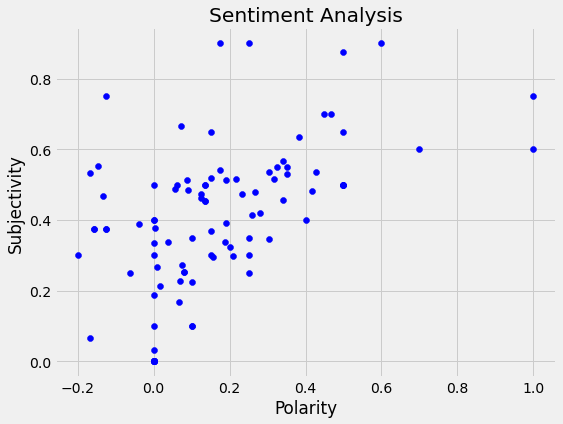

In [33]:
#Podemos observar a simple vista que la mayoria de los tweets son positivos, ya que estan por arriba del 0 (cero)
plt.figure(figsize=(8,6)) 
for i in range(0, df.shape[0]):
    plt.scatter(df["Polarity"][i], df["Subjectivity"][i], color='Blue') 

plt.title('Sentiment Analysis') 
plt.xlabel('Polarity') 
plt.ylabel('Subjectivity') 
plt.show()

In [35]:
# Porcentaje de tweets positivos
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Tweets']
ptweets

round((ptweets.shape[0] / df.shape[0]) * 100 , 1)

69.0

In [15]:
# Porcentaje de tweets Negativos
ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets['Tweets']
ntweets

round( (ntweets.shape[0] / df.shape[0]) * 100, 1)

12.0

In [16]:
# Porcentaje de tweets Neutros
ntweets = df[df.Analysis == 'Neutral']
ntweets = ntweets['Tweets']
ntweets

round( (ntweets.shape[0] / df.shape[0]) * 100, 1)

19.0

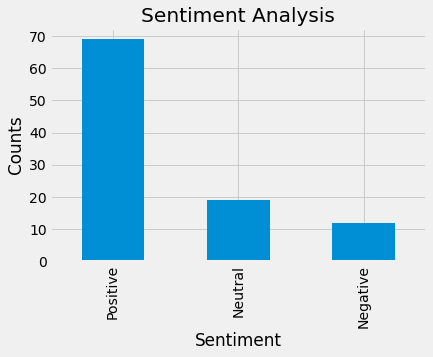

In [17]:
# Vemos mediante una grafica como la cantidad de tweets positivos, negativos y neutros
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind = 'bar')
plt.show()